In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.13.1'

In [3]:
mnist=tf.keras.datasets.mnist # 28*28 images of hand-written digits 0-9
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [6]:
print(x_train.shape, type(x_train))

(60000, 28, 28) <class 'numpy.ndarray'>


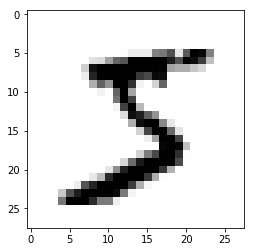

In [11]:
plt.imshow(x_train[0],cmap=plt.cm.binary)#first sample
plt.show()

In [12]:
#normalize
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

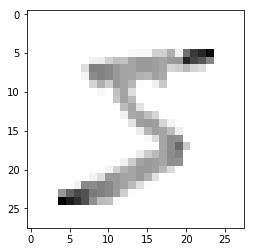

In [13]:
plt.imshow(x_train[0],cmap=plt.cm.binary)#first sample
plt.show()

In [16]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#flattern the entry array
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # 128 neurals
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2631 - acc: 0.9235
Epoch 2/3
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1070 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0733 - acc: 0.9769


In [20]:
val_loss,val_acc=model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0976 - acc: 0.9699
0.09756659116153606 0.9699


In [21]:
model.save('epic_num_eader.model')
new_model=tf.keras.models.load_model('epic_num_eader.model')

In [23]:
type(x_test)

numpy.ndarray

In [24]:
x_test.shape

(10000, 28, 28)

In [26]:
predictions=model.predict([x_test])

In [27]:
print(predictions)

[[1.2539739e-09 1.7664085e-08 2.8854083e-06 ... 9.9998093e-01
  1.5999630e-07 6.1373080e-06]
 [6.8858481e-07 2.4450419e-05 9.9997127e-01 ... 2.1323041e-09
  4.0650261e-07 5.5615960e-11]
 [3.4756042e-09 9.9993479e-01 1.9677314e-06 ... 5.6145145e-05
  2.2068209e-06 4.5082106e-07]
 ...
 [5.0332183e-10 4.3424387e-07 1.0221167e-08 ... 3.9052091e-05
  7.7336631e-07 1.8172110e-03]
 [2.7287802e-05 9.2881664e-06 5.2141954e-06 ... 1.4231686e-04
  3.0618727e-02 3.4437837e-06]
 [2.0102179e-07 2.1430282e-08 2.0388330e-07 ... 1.7697754e-10
  2.8172210e-06 3.8744472e-10]]


In [28]:
import numpy as np
print(np.argmax(predictions[0]))

7


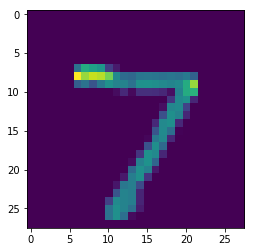

In [29]:
plt.imshow(x_test[0])
plt.show()

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

Batch Size and Gradient Descent

Stochastic, Batch, and Minibatch Gradient Descent in Keras

Multi-Class Classification Problem

MLP Fit With Batch Gradient Descent

MLP Fit With Stochastic Gradient Descent

MLP Fit With Minibatch Gradient Descent

Effect of Batch Size on Model Behavior

### Generate 2 d classification dataset

In [86]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from numpy import where

In [87]:
# dataset: numpy arrays
X, y=make_blobs(n_samples=1000, centers=3, n_features=2,cluster_std=2, random_state=2)
print(X, type(X), y, type(y))

[[  0.48719811  -0.43160548]
 [ -1.48958879  -3.47915742]
 [ -2.06250444  -7.73300419]
 ...
 [ -4.4839941   -3.17623663]
 [ -1.92705839   2.94801349]
 [ -2.32988529 -10.66109273]] <class 'numpy.ndarray'> [2 2 2 0 1 0 1 1 2 2 1 0 1 0 0 1 2 2 1 1 2 0 0 2 1 1 2 2 0 1 0 0 1 2 1 0 0
 1 2 0 2 1 1 2 1 0 0 1 1 0 0 2 0 2 2 2 2 0 1 1 2 0 2 0 0 1 0 1 2 0 1 1 1 2
 1 2 1 0 2 2 2 0 1 2 0 1 2 2 1 1 2 0 2 0 0 2 1 0 2 0 2 2 2 1 1 1 1 0 0 2 0
 2 1 2 0 0 0 0 1 2 0 2 0 1 0 2 2 0 2 0 2 0 0 0 1 0 2 1 2 1 2 1 0 1 2 1 0 0
 1 2 1 1 1 0 1 0 1 1 1 1 0 2 2 1 0 1 0 1 1 1 1 2 2 0 2 2 1 2 1 1 2 0 1 2 2
 2 2 1 0 0 0 2 1 1 1 0 2 1 1 2 2 2 2 2 2 2 1 1 0 2 0 1 2 2 0 2 0 1 0 1 1 2
 2 0 2 0 1 0 2 1 2 2 1 2 2 1 2 0 1 2 0 1 2 1 0 0 2 0 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 2 2 0 1 0 2 1 1 0 0 2 0 1 0 2 0 0 2 2 2 0 2 0 1 0 2 2 2 1 2 0 1 1
 1 0 2 0 1 0 2 0 0 1 0 1 0 0 2 1 1 2 1 0 0 1 1 1 0 1 1 0 0 2 2 0 0 0 2 0 0
 2 2 2 0 1 1 1 1 0 0 1 2 0 0 2 2 0 2 1 1 0 1 0 1 0 0 0 1 2 2 0 1 2 1 0 0 0
 1 1 0 0 0 2 1 2 2 0 2 0 2 2 2 1 1 0 2 1 2 2 1

(array([  3,   5,  11,  13,  14,  21,  22,  28,  30,  31,  35,  36,  39,
        45,  46,  49,  50,  52,  57,  61,  63,  64,  66,  69,  77,  81,
        84,  91,  93,  94,  97,  99, 107, 108, 110, 114, 115, 116, 117,
       120, 122, 124, 127, 129, 131, 132, 133, 135, 142, 146, 147, 153,
       155, 160, 164, 166, 173, 181, 188, 189, 190, 195, 208, 210, 214,
       216, 218, 223, 225, 227, 237, 240, 244, 245, 247, 250, 253, 255,
       259, 265, 267, 271, 272, 274, 276, 278, 279, 283, 285, 287, 293,
       297, 299, 301, 303, 304, 306, 308, 309, 315, 316, 320, 323, 324,
       327, 328, 329, 331, 332, 336, 341, 342, 345, 346, 349, 353, 355,
       357, 358, 359, 363, 367, 368, 369, 372, 373, 374, 379, 381, 387,
       393, 394, 396, 402, 409, 410, 416, 419, 423, 424, 425, 435, 436,
       439, 444, 445, 446, 447, 449, 450, 451, 452, 458, 464, 465, 469,
       471, 472, 475, 476, 477, 478, 480, 481, 484, 485, 486, 488, 490,
       496, 499, 500, 501, 502, 504, 505, 510, 512, 513, 518, 5

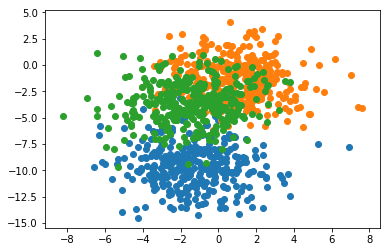

In [88]:
#scatterplot between two features
for class_value in range(3):
    #select indices of points within the class
    row_ix=where(y==class_value) #return indices
    print(row_ix)
    #identify the x elements in the same class
    plt.scatter(X[row_ix,0],X[row_ix,1])
plt.show()

In [89]:
#hot encode y
print(y.shape, np.unique(y), X.shape)

(1000,) [0 1 2] (1000, 2)


In [90]:
from tensorflow.keras.utils import to_categorical
# Converts a class vector (integers) to binary class matrix.
y=to_categorical(y)
print(y, y.shape, np.unique(y))

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] (1000, 3) [0. 1.]


### Multilayer Perceptron model : three layers of nodes (one hiden layer), nonlinear activation function and backpropagation 

In [91]:
# split train and test samples
n_train=500
trainX, testX=X[:n_train,:], X[n_train:,:]
trainy, testy=y[:n_train], y[n_train:]

In [92]:
print(trainX.shape, trainy.shape)

(500, 2) (500, 3)


In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [94]:
# define model: one hidern layer with 50 nodes and recitified linear activation function and He random weight initialization 
model=tf.keras.models.Sequential() #constructor
# relu:Applies the rectified linear unit activation function.
model.add(Dense(50, input_dim=2,activation='relu',kernel_initializer='he_uniform'))
# softmax: normalized exponential function to convert number to probability distribution
model.add(Dense(3, activation='softmax'))

In [95]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(2, 50) dtype=float32>,
 <tf.Variable 'dense_5/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'dense_6/kernel:0' shape=(50, 3) dtype=float32>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32>]

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


#### Batch size=full length of train data, learning rate =0.001

In [97]:
# compile the model using stochastic gradient descent
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [98]:
#fit model
history=model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

In [99]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.814, Test: 0.836


In [100]:
#list alll data in history:https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


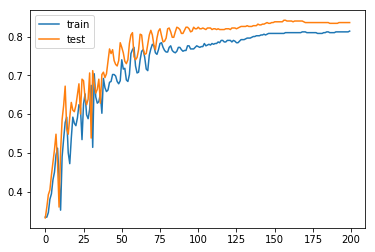

In [101]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

#### Stochastic graient descent: Batch size=1, learning rate =0.01

In [102]:
# change batch size to 1
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.510, Test: 0.526


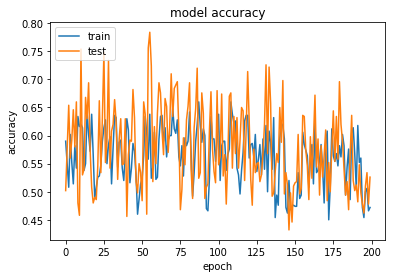

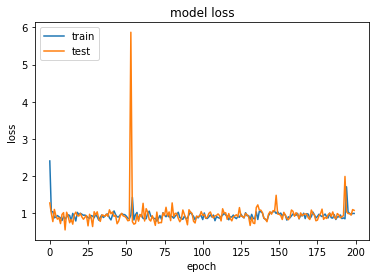

In [103]:
# summarize history for accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### stochastic graient descent: Batch size=1, learning rate =0.001

In [104]:
#change to smaller learning rate for stochastic gradient descendent
# compile the model using stochastic gradient descent
opt=SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.794, Test: 0.782


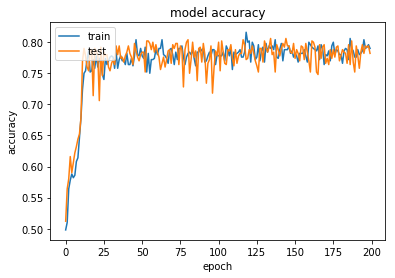

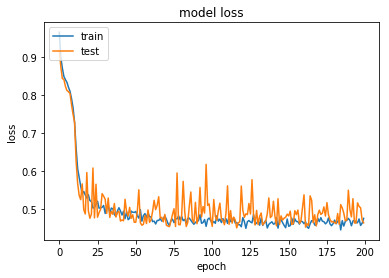

In [105]:
# summarize history for accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Manibatch graient descent: default Batch size=32, learning rate =0.01

Train: 0.804, Test: 0.782


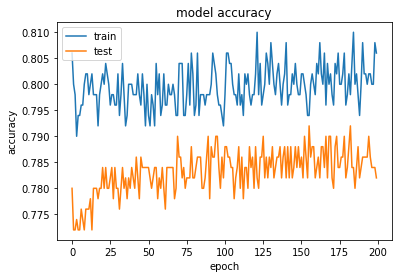

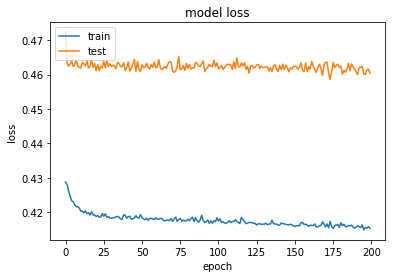

In [106]:
# batch gradient decendent:change batch size to 32, epoch=200 meaning 200 updates on weights
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# summarize history for accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Compare batch size

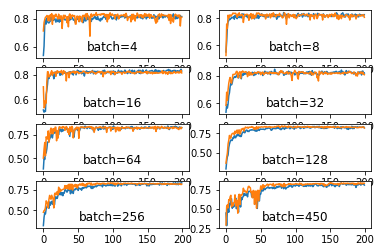

In [107]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
    # plot learning curves
    # plot learning curves
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.title('batch='+str(n_batch), pad=-40)
    
# create learning curves

batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
pyplot.show()

### Conclusions: small batch results generally in rapid learning but a volatile learning process with higher variance in the classification accuracy. Larger batch sizes slow down the learning process but the final stages result in a convergence to a more stable model exemplified by lower variance in classification accuracy.